# Predicting Cancer Cell Line Drug Sensitivity with Ensemble Machine Learning Models

# Exploratory Data Analysis

## Inspired by plots generated by GDSC (Genomics of Drug Sensitivity in Cancer)

These plots helped solidify the focus on ln(IC50) as the response variable for drug sensitivity prediction. It also confirmed that within the GDSC dataset, the z-score is associated with ln(IC50) and therefore shouldn't be included in the prediction process. Lastly, it establishes what the GDSC determines to be sensitive and resistant: -2.0 and +2.0, respectively. 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os
sys.path.append("../src")

from plotting import plot_predictions_by_cancer, plot_pred_vs_obs, plot_residuals
from elasticnet import run_elasticnet
from feature import prepare_features, get_drug_data
from randomforest import run_randomforest_ablation, fit_randomforest_best, run_randomforest


df = pd.read_parquet("../data/df_clean.parquet")
mut_df = pd.read_parquet("../data/mut_df_clean.parquet")

In [3]:
gdsc1_df = pd.read_csv("../data/gdsc1.csv")  
gdsc1_df.head()

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC1,342,15580432,684057,ES5,SIDM00263,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,3.966813,0.985678,0.026081,1.299144
1,GDSC1,342,15580806,684059,ES7,SIDM00269,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.692090,0.972690,0.110059,0.156076
2,GDSC1,342,15581198,684062,EW-11,SIDM00203,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.477990,0.944459,0.087019,-0.035912
3,GDSC1,342,15581542,684072,SK-ES-1,SIDM01111,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.033564,0.950758,0.016290,-0.434437
4,GDSC1,342,15581930,687448,COLO-829,SIDM00909,SKCM,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.966007,0.954778,0.180255,0.401702


([], [])

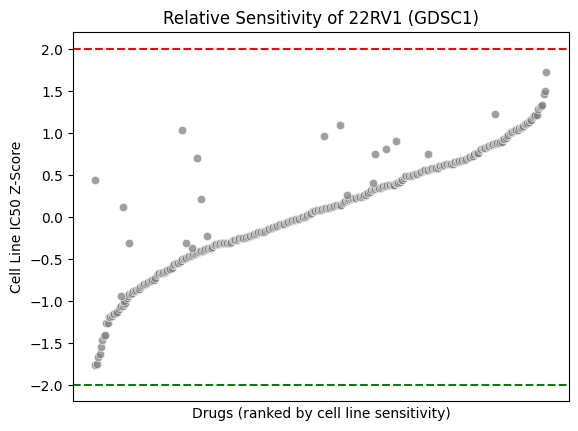

In [13]:
cl_df = gdsc1_df[gdsc1_df["CELL_LINE_NAME"] == "22RV1"]
cl_df_sorted = cl_df.sort_values(by="Z_SCORE", ascending=True)
#sns.lineplot(x="DRUG_NAME", y="Z_SCORE", data=cl_df_sorted)
sns.scatterplot(x="DRUG_NAME", y="Z_SCORE", data=cl_df_sorted, color="gray", alpha=0.75)
plt.axhline(y=2.0, color='red', linestyle='--', label='resistant')
plt.axhline(y=-2.0, color='green', linestyle='--', label='sensitive')
plt.title("Relative Sensitivity of 22RV1 (GDSC1)")
plt.xlabel("Drugs (ranked by cell line sensitivity)")
plt.ylabel("Cell Line IC50 Z-Score")
plt.xticks([])


([], [])

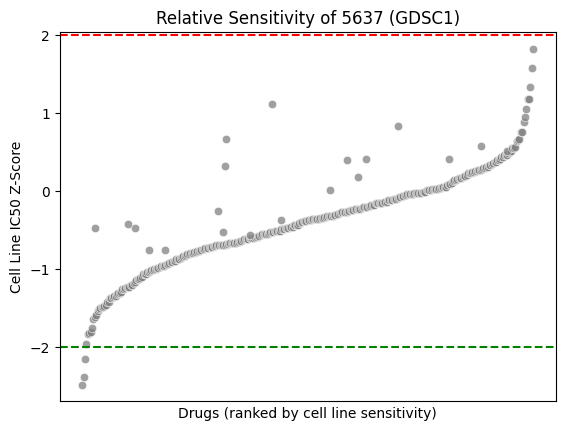

In [14]:
cl_df = gdsc1_df[gdsc1_df["CELL_LINE_NAME"] == "5637"]
cl_df_sorted = cl_df.sort_values(by="Z_SCORE", ascending=True)
#sns.lineplot(x="DRUG_NAME", y="Z_SCORE", data=cl_df_sorted)
sns.scatterplot(x="DRUG_NAME", y="Z_SCORE", data=cl_df_sorted, color="gray", alpha=0.75)
plt.axhline(y=2.0, color='red', linestyle='--', label='resistant')
plt.axhline(y=-2.0, color='green', linestyle='--', label='sensitive')
plt.title("Relative Sensitivity of 5637 (GDSC1)")
plt.xlabel("Drugs (ranked by cell line sensitivity)")
plt.ylabel("Cell Line IC50 Z-Score")
plt.xticks([])

([], [])

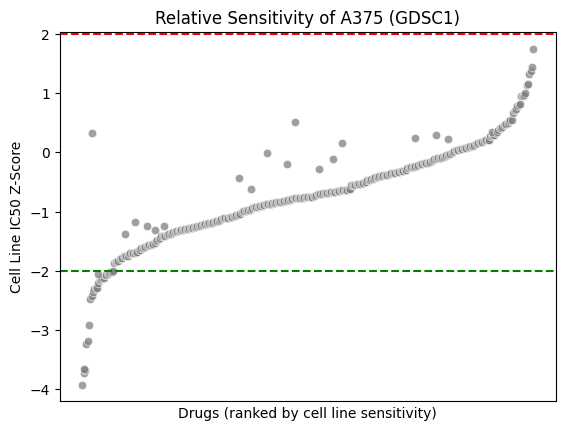

In [15]:
cl_df = gdsc1_df[gdsc1_df["CELL_LINE_NAME"] == "A375"]
cl_df_sorted = cl_df.sort_values(by="Z_SCORE", ascending=True)
#sns.lineplot(x="DRUG_NAME", y="Z_SCORE", data=cl_df_sorted)
sns.scatterplot(x="DRUG_NAME", y="Z_SCORE", data=cl_df_sorted, color="gray", alpha=0.75)
plt.axhline(y=2.0, color='red', linestyle='--', label='resistant')
plt.axhline(y=-2.0, color='green', linestyle='--', label='sensitive')
plt.title("Relative Sensitivity of A375 (GDSC1)")
plt.xlabel("Drugs (ranked by cell line sensitivity)")
plt.ylabel("Cell Line IC50 Z-Score")
plt.xticks([])